In [80]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import linregress
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016.csv")
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")
socio = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")


FileNotFoundError: [Errno 2] File b'Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv' does not exist: b'Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv'

In [ ]:
potholes.rename(columns = {"Community Area": "Community Area Number"})

In [77]:
merge_table = pd.merge(potholes, socio, on="Community Area Number")

KeyError: 'Community Area Number'

In [78]:
potholes.dtypes

CREATION DATE                          object
STATUS                                 object
COMPLETION DATE                        object
SERVICE REQUEST NUMBER                 object
TYPE OF SERVICE REQUEST                object
CURRENT ACTIVITY                       object
MOST RECENT ACTION                     object
NUMBER OF POTHOLES FILLED ON BLOCK    float64
STREET ADDRESS                         object
ZIP                                   float64
X COORDINATE                          float64
Y COORDINATE                          float64
Ward                                  float64
Police District                       float64
Community Area                        float64
SSA                                   float64
LATITUDE                              float64
LONGITUDE                             float64
LOCATION                               object
dtype: object

In [79]:
potholes

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,12/31/2016,Completed - Dup,01/20/2017,16-08564228,Pothole in Street,NaN,NaN,NaN,2951 W TOUHY AVE,60645.0,1.155431e+06,1.947588e+06,50.0,24.0,2.0,NaN,42.011863,-87.704066,"(42.011863340092, -87.704065711004)"
1,12/31/2016,Completed,01/17/2017,16-08564309,Pothole in Street,Final Outcome,Pothole Patched,10.0,1335 W DEVON AVE,60660.0,1.166086e+06,1.942625e+06,48.0,24.0,77.0,26.0,41.998038,-87.664387,"(41.998037747035, -87.664387098024)"
2,12/31/2016,Completed,01/13/2017,16-08560586,Pothole in Street,Final Outcome,Pothole Patched,27.0,131 N CENTRAL AVE,60644.0,1.139027e+06,1.900420e+06,29.0,15.0,25.0,NaN,41.883187,-87.764813,"(41.883186901358, -87.7648132927)"
3,12/31/2016,Completed,01/17/2017,16-08559206,Pothole in Street,Final Outcome,Pothole Patched,1.0,4920 W FOSTER AVE,60630.0,1.142696e+06,1.934127e+06,39.0,16.0,12.0,NaN,41.975397,-87.751504,"(41.975396932539, -87.751504044466)"
4,12/31/2016,Completed,01/09/2017,16-08558480,Pothole in Street,Final Outcome,Pothole Patched,16.0,6315 N CICERO AVE,60646.0,1.143269e+06,1.941628e+06,39.0,17.0,12.0,NaN,41.996105,-87.748193,"(41.996105475991, -87.74819337237)"
5,12/31/2016,Completed,01/04/2017,16-08562001,Pothole in Street,Final Outcome,Pothole Patched,2.0,2543 S DAMEN AVE,60608.0,1.163441e+06,1.887121e+06,25.0,10.0,31.0,NaN,41.845550,-87.675522,"(41.845549957711, -87.675522093081)"
6,12/31/2016,Completed,01/09/2017,16-08558761,Pothole in Street,Final Outcome,Pothole Patched,2.0,2921 W BELLE PLAINE AVE,60618.0,1.156075e+06,1.927106e+06,33.0,17.0,16.0,NaN,41.955659,-87.701718,"(41.955659397156, -87.701717714781)"
7,12/31/2016,Completed - Dup,10/06/2017,16-08570078,Pothole in Street,NaN,NaN,NaN,941 S WOOD ST,60612.0,1.164528e+06,1.895845e+06,27.0,12.0,28.0,NaN,41.869250,-87.671273,"(41.869250074812, -87.671273249197)"
8,12/31/2016,Completed,01/19/2017,16-08564248,Pothole in Street,Final Outcome,Pothole Patched,16.0,1913 W TOUHY AVE,60626.0,1.162218e+06,1.947851e+06,49.0,24.0,1.0,NaN,42.012456,-87.678737,"(42.01245572154, -87.678737254108)"
9,12/31/2016,Completed,01/04/2017,16-08570117,Pothole in Street,Final Outcome,Pothole Patched,15.0,3115 E 87TH ST,60617.0,1.198556e+06,1.847887e+06,10.0,4.0,46.0,NaN,41.737316,-87.548092,"(41.737316336305, -87.548091844142)"


In [56]:
socio

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [49]:
group_potholes = potholes.groupby("Community Area").count()
group_potholes.head()



,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
Community Area,,,,,,,,,,,,,,,,,,
0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632


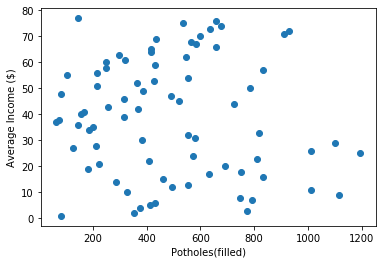

In [50]:
# Plot out potholes v socioeconomic status by ward
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['Community Area Number']
plt.scatter(x_values,y_values)
plt.xlabel('Potholes(filled)')
plt.ylabel('Average Income ($)')
plt.show()

The r-squared is: nan


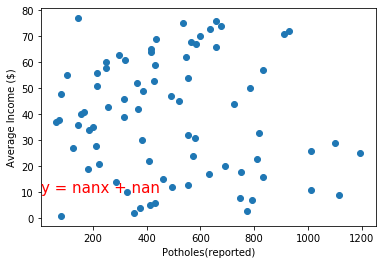

In [51]:
# Linear Regression 
x_values = group_potholes['NUMBER OF POTHOLES FILLED ON BLOCK']
y_values = socio['Community Area Number']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Potholes(reported)')
plt.ylabel('Average Income ($)')
print(f"The r-squared is: {rvalue}")
plt.show()